In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd


plt.rc('font', family='sans-serif', serif='Helvetica')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=16)



In [2]:
data_path = '/home/tanmay/JHU/project/deep-mediation/manuscript/results/simulation-2'

In [3]:
df_8_shallow = pd.read_excel(os.path.join(data_path,'simulation-2-image-size-8-shallow.xlsx'))
df_32_shallow = pd.read_excel(os.path.join(data_path,'simulation-2-image-size-32-shallow.xlsx'))
df_64_shallow = pd.read_excel(os.path.join(data_path,'simulation-2-image-size-64-shallow.xlsx'))

df_8_deep = pd.read_excel(os.path.join(data_path,'simulation-2-image-size-8-deep.xlsx'))
df_32_deep = pd.read_excel(os.path.join(data_path,'simulation-2-image-size-32-deep.xlsx'))
df_64_deep = pd.read_excel(os.path.join(data_path,'simulation-2-image-size-64-deep.xlsx'))

df_8_svr = pd.read_excel(os.path.join(data_path,'simulation-2-image-size-8-svr.xlsx'))
df_32_svr = pd.read_excel(os.path.join(data_path,'simulation-2-image-size-32-svr.xlsx'))
df_64_svr = pd.read_excel(os.path.join(data_path,'simulation-2-image-size-64-svr.xlsx'))

In [4]:
def create_empty_df(num_runs,num_iters):
    # Creates an empty dataFrame
    a = np.empty((num_runs,num_iters))
    a[:] = np.nan
    dataFrame = None
    parameters = ['alpha0', 'beta0','alpha','beta','gamma']
    for params in parameters:
        iter = ['iter_'+str(i) for i in range(num_iters)]
        pdindex = pd.MultiIndex.from_product([[params], iter],
                                             names=['parameters', 'runs']) 
        frame = pd.DataFrame(a, columns = pdindex,index = range(0,num_runs))
        dataFrame = pd.concat([dataFrame,frame],axis=1)
    return dataFrame

def format_dataframe(input_df):
    
    df = create_empty_df(101,20)
    input_df.columns = ['col-'+str(i) for i in range(1,102)]
    start = 0
    end = 20
    k = 0
    params = ['alpha0', 'beta0','alpha','beta','gamma']
    for idx,j in enumerate(params):
        for i in range(start,end):
            k = 20*idx+i
            df[j,'iter_'+str(i)].loc[1:100] = input_df['col-'+str(k+2)]
    df = df.dropna()
    
    return df


def create_convergence_plot(df,variables=['alpha0','beta0','alpha','beta','gamma'],title="Convergence"):
    
    fig, axs = plt.subplots(3, 2,figsize=(20,20))
    axs[2,1].remove()
    
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=90)
    
    for i in range(0,100):
        axs[0, 0].plot(df[variables[0]].iloc[i])
        axs[0, 1].plot(df[variables[1]].iloc[i])
        axs[1, 0].plot(df[variables[2]].iloc[i])
        axs[1, 1].plot(df[variables[3]].iloc[i])
        axs[2, 0].plot(df[variables[4]].iloc[i])
    
    axs[0, 0].set_title(str("Convergence for plot for " + variables[0]))
    axs[0, 1].set_title(str("Convergence for plot for " + variables[1]))
    axs[1, 0].set_title(str("Convergence for plot for " + variables[2]))
    axs[1, 1].set_title(str("Convergence for plot for " + variables[3]))
    axs[2, 0].set_title(str("Convergence for plot for " + variables[4]))

    plt.suptitle(title)
    fig.tight_layout() 
    fig.subplots_adjust(top=0.95)
    plt.savefig(os.path.join(data_path,title+'.png'),dpi=300,bbox_inches='tight')

    plt.show()
    
    

In [5]:
df_8_shallow_format = format_dataframe(df_8_shallow)
df_32_shallow_format = format_dataframe(df_32_shallow)
df_64_shallow_format = format_dataframe(df_64_shallow)

df_8_deep_format = format_dataframe(df_8_deep)
df_32_deep_format = format_dataframe(df_32_deep)
df_64_deep_format = format_dataframe(df_64_deep)

df_8_svr_format = format_dataframe(df_8_svr)
df_32_svr_format = format_dataframe(df_32_svr)
df_64_svr_format = format_dataframe(df_64_svr)
# print(df_100.shape,df_500.shape,df_1000.shape)

/home/tanmay/anaconda3/envs/deep_structure/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
df_64_svr_format.shape,df_32_svr_format.shape,df_8_svr_format.shape

((100, 100), (100, 100), (100, 100))

In [7]:
df = pd.DataFrame(columns=['alpha','beta','gamma','alpha*beta','Algorithm'])
iteration_to_use = 'iter_19'
df['alpha'] = pd.concat([df_8_shallow_format['alpha'][iteration_to_use],
                         df_8_deep_format['alpha'][iteration_to_use],
                         df_8_svr_format['alpha'][iteration_to_use],
                         df_32_shallow_format['alpha'][iteration_to_use],
                         df_32_deep_format['alpha'][iteration_to_use],
                         df_32_svr_format['alpha'][iteration_to_use],
                         df_64_shallow_format['alpha'][iteration_to_use],
                         df_64_deep_format['alpha'][iteration_to_use],
                   df_64_svr_format['alpha'][iteration_to_use]])
df['alpha'] = df['alpha'].astype('float')

df['beta'] = pd.concat([df_8_shallow_format['beta'][iteration_to_use],
                         df_8_deep_format['beta'][iteration_to_use],
                         df_8_svr_format['beta'][iteration_to_use],
                         df_32_shallow_format['beta'][iteration_to_use],
                         df_32_deep_format['beta'][iteration_to_use],
                         df_32_svr_format['beta'][iteration_to_use],
                         df_64_shallow_format['beta'][iteration_to_use],
                         df_64_deep_format['beta'][iteration_to_use],
                   df_64_svr_format['beta'][iteration_to_use]])
df['beta'] = df['beta'].astype('float')

df['gamma'] = pd.concat([df_8_shallow_format['gamma'][iteration_to_use],
                         df_8_deep_format['gamma'][iteration_to_use],
                         df_8_svr_format['gamma'][iteration_to_use],
                         df_32_shallow_format['gamma'][iteration_to_use],
                         df_32_deep_format['gamma'][iteration_to_use],
                         df_32_svr_format['gamma'][iteration_to_use],
                         df_64_shallow_format['gamma'][iteration_to_use],
                         df_64_deep_format['gamma'][iteration_to_use],
                   df_64_svr_format['gamma'][iteration_to_use]])
df['gamma'] = df['gamma'].astype('float')

df['Image size'] = np.concatenate([['8x8']*300,['32x32']*300,['64x64']*300])
df['Image size'] = df['Image size'].astype('category')

df['Algorithm'] = np.array([['Shallow-network']*100,['Deep-network']*100,['SVR']*100]*3).flatten()#np.concatenate([['Shallow-network']*100,['Deep-network']*100,['SVR']*100])
df['Algorithm'] = df['Algorithm'].astype('category')

df['alpha*beta'] = pd.concat([df_8_shallow_format['alpha',iteration_to_use]*df_8_shallow_format['beta',iteration_to_use],
                              df_8_deep_format['alpha',iteration_to_use]*df_8_deep_format['beta',iteration_to_use],
                              df_8_svr_format['alpha',iteration_to_use]*df_8_svr_format['beta',iteration_to_use],
                              df_32_shallow_format['alpha',iteration_to_use]*df_32_shallow_format['beta',iteration_to_use],
                              df_32_deep_format['alpha',iteration_to_use]*df_32_deep_format['beta',iteration_to_use],
                              df_32_svr_format['alpha',iteration_to_use]*df_32_svr_format['beta',iteration_to_use],
                              df_64_shallow_format['alpha',iteration_to_use]*df_64_shallow_format['beta',iteration_to_use],
                              df_64_deep_format['alpha',iteration_to_use]*df_64_deep_format['beta',iteration_to_use],
                              df_64_svr_format['alpha',iteration_to_use]*df_64_svr_format['beta',iteration_to_use]])
df['alpha*beta'] = df['alpha*beta'].astype('float')

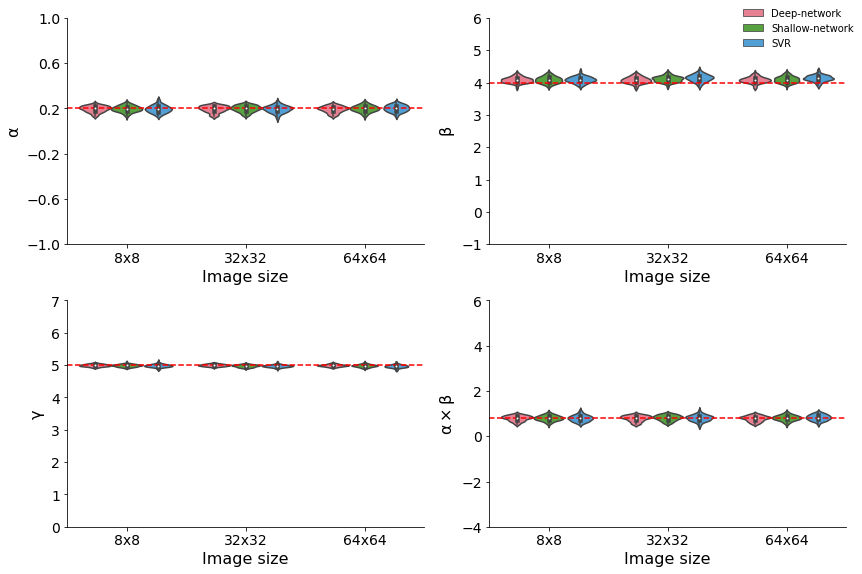

In [10]:
fig = plt.figure(figsize=(12,8))
plt.subplot(2, 2, 1)
ax1 = sns.violinplot(x="Image size", y="alpha", hue="Algorithm",data=df, palette="husl",
                    hue_order=[ "Deep-network", "Shallow-network", "SVR"],
                    order = ['8x8','32x32','64x64'])
ax1.set_ylabel(r'$\mathrm{\alpha}$')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.grid(False)
ax1.set_ylim([-1,1])
ax1.set_yticks([-1,-0.6,-0.2,0.2,0.6,1])
ax1.axhline(0.20, ls='--',c='red')
ax1.legend_.remove()

#####################################################################################################

plt.subplot(2, 2, 2)
ax2 = sns.violinplot(x="Image size",y="beta",hue='Algorithm',data=df, palette="husl",
                    hue_order=[ "Deep-network", "Shallow-network", "SVR"],
                    order = ['8x8','32x32','64x64'])
ax2.set_ylabel(r'$\mathrm{\beta}$')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_color('black')
ax2.spines['left'].set_color('black')
ax2.grid(False)
ax2.set_ylim([-1,6])
ax2.axhline(4, ls='--',c='red')
ax2.legend_.remove()

#####################################################################################################

plt.subplot(2, 2, 3)
ax3 = sns.violinplot(x="Image size",y="gamma",hue='Algorithm',data=df, palette="husl",
                    hue_order=[ "Deep-network", "Shallow-network", "SVR"],
                    order = ['8x8','32x32','64x64'])
ax3.set_ylabel(r'$\mathrm{\gamma}$')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_color('black')
ax3.spines['left'].set_color('black')
ax3.grid(False)
ax3.set_ylim([0,7])
ax3.axhline(5, ls='--',c='red')
ax3.legend_.remove()

#####################################################################################################

plt.subplot(2, 2, 4)
ax4 = sns.violinplot(x="Image size",y="alpha*beta",hue='Algorithm',data=df, palette="husl",
                    hue_order=[ "Deep-network", "Shallow-network", "SVR"],
                    order = ['8x8','32x32','64x64'])
ax4.set_ylabel(r'$\mathrm{\alpha \times \beta}$')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_color('black')
ax4.spines['left'].set_color('black')
ax4.grid(False)
ax4.set_ylim([-4,6])
ax4.axhline(0.80, ls='--',c='red')
ax4.legend_.remove()

# ax = df.set_index(field).loc[day_order].plot(kind="bar", legend=False)


handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc = 'upper right',frameon=False)
plt.tight_layout()
plt.savefig(os.path.join(data_path,'parameters-simulation-2-model-comparison-violin-plot.png'),dpi=600,
           bbox_inches='tight')
plt.show()

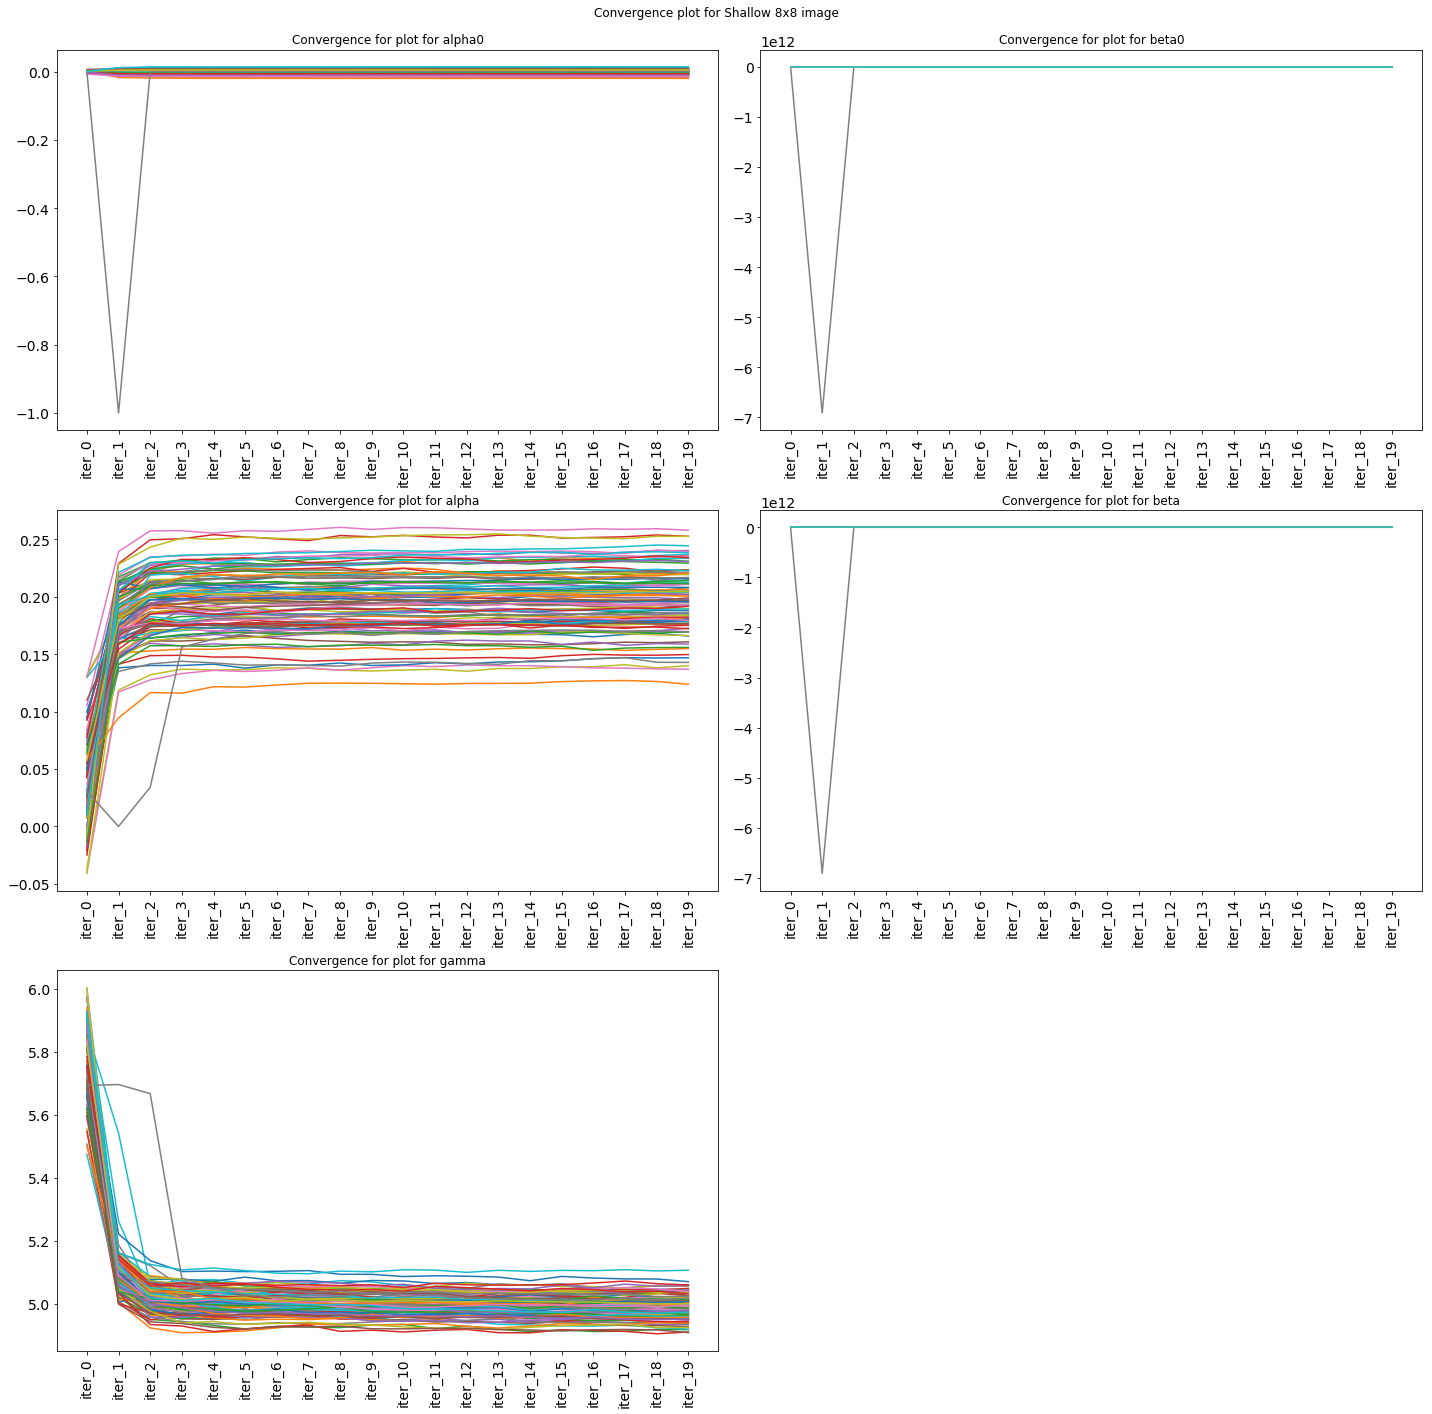

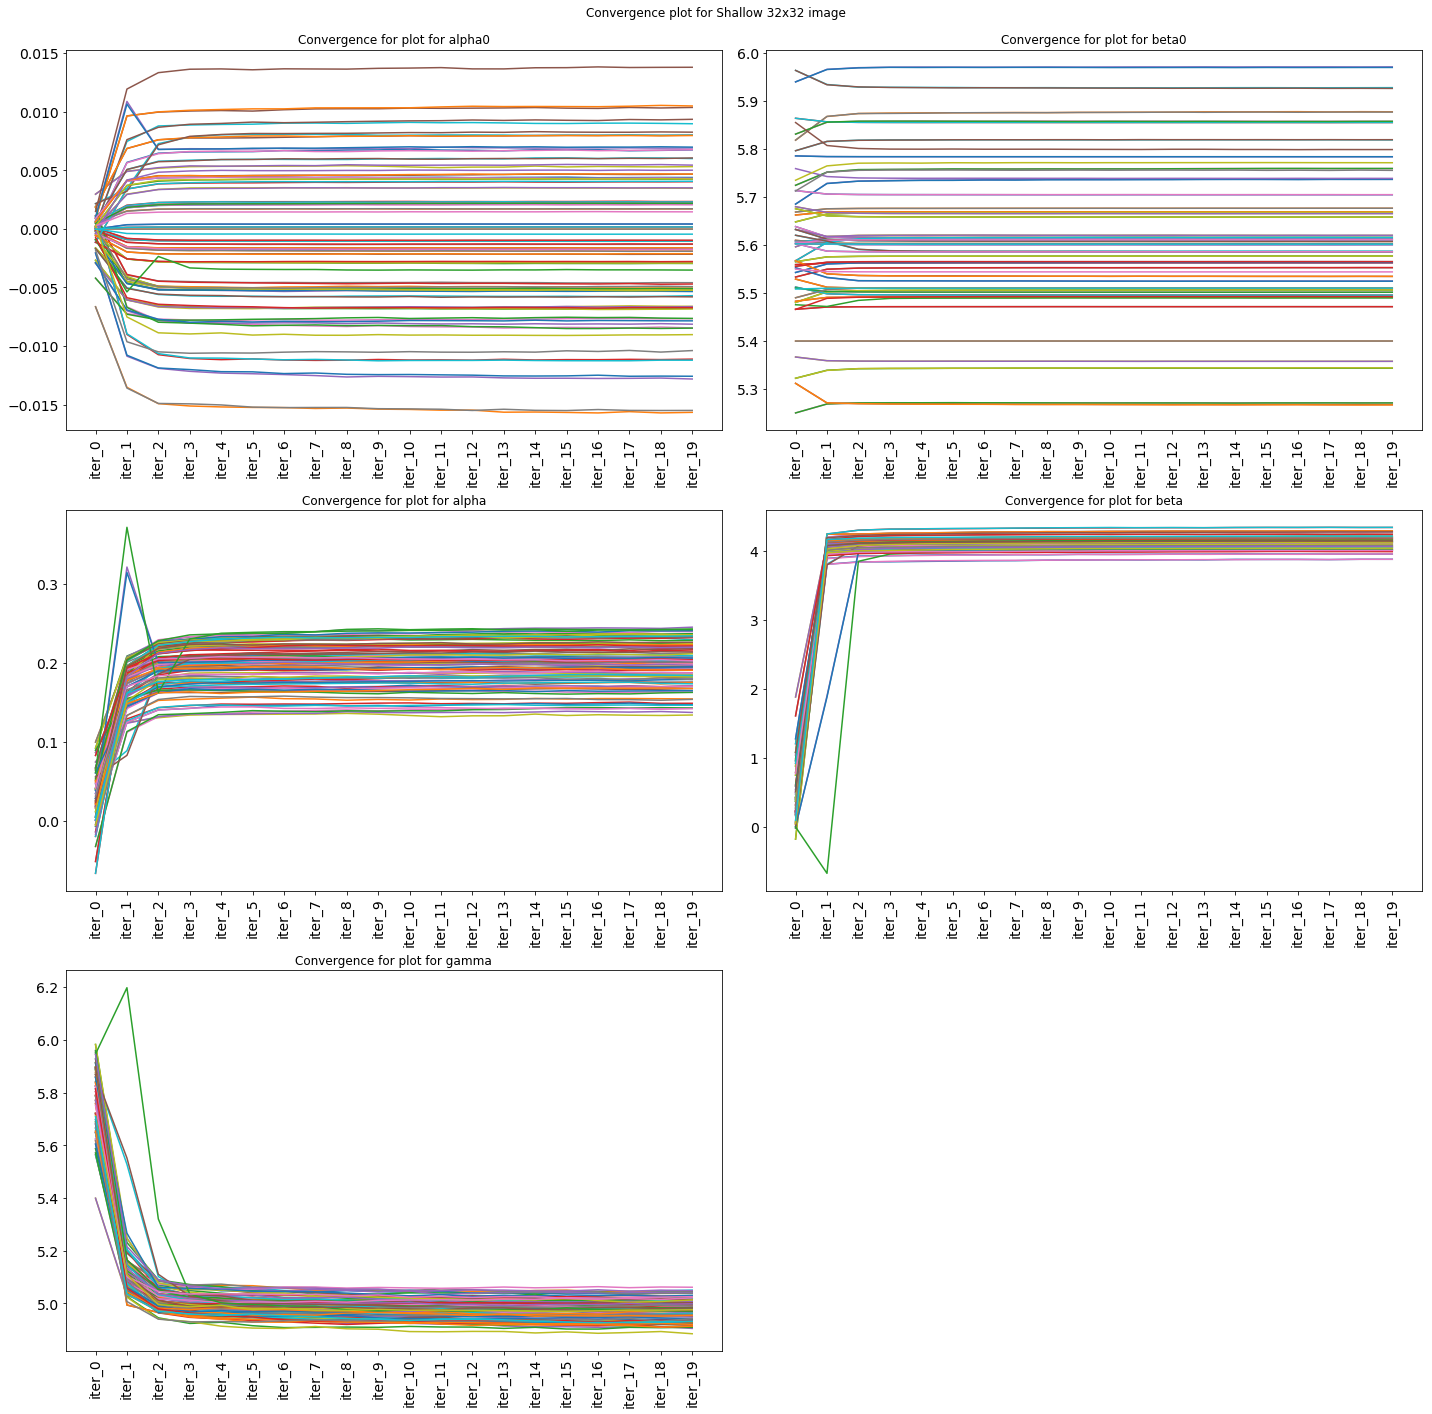

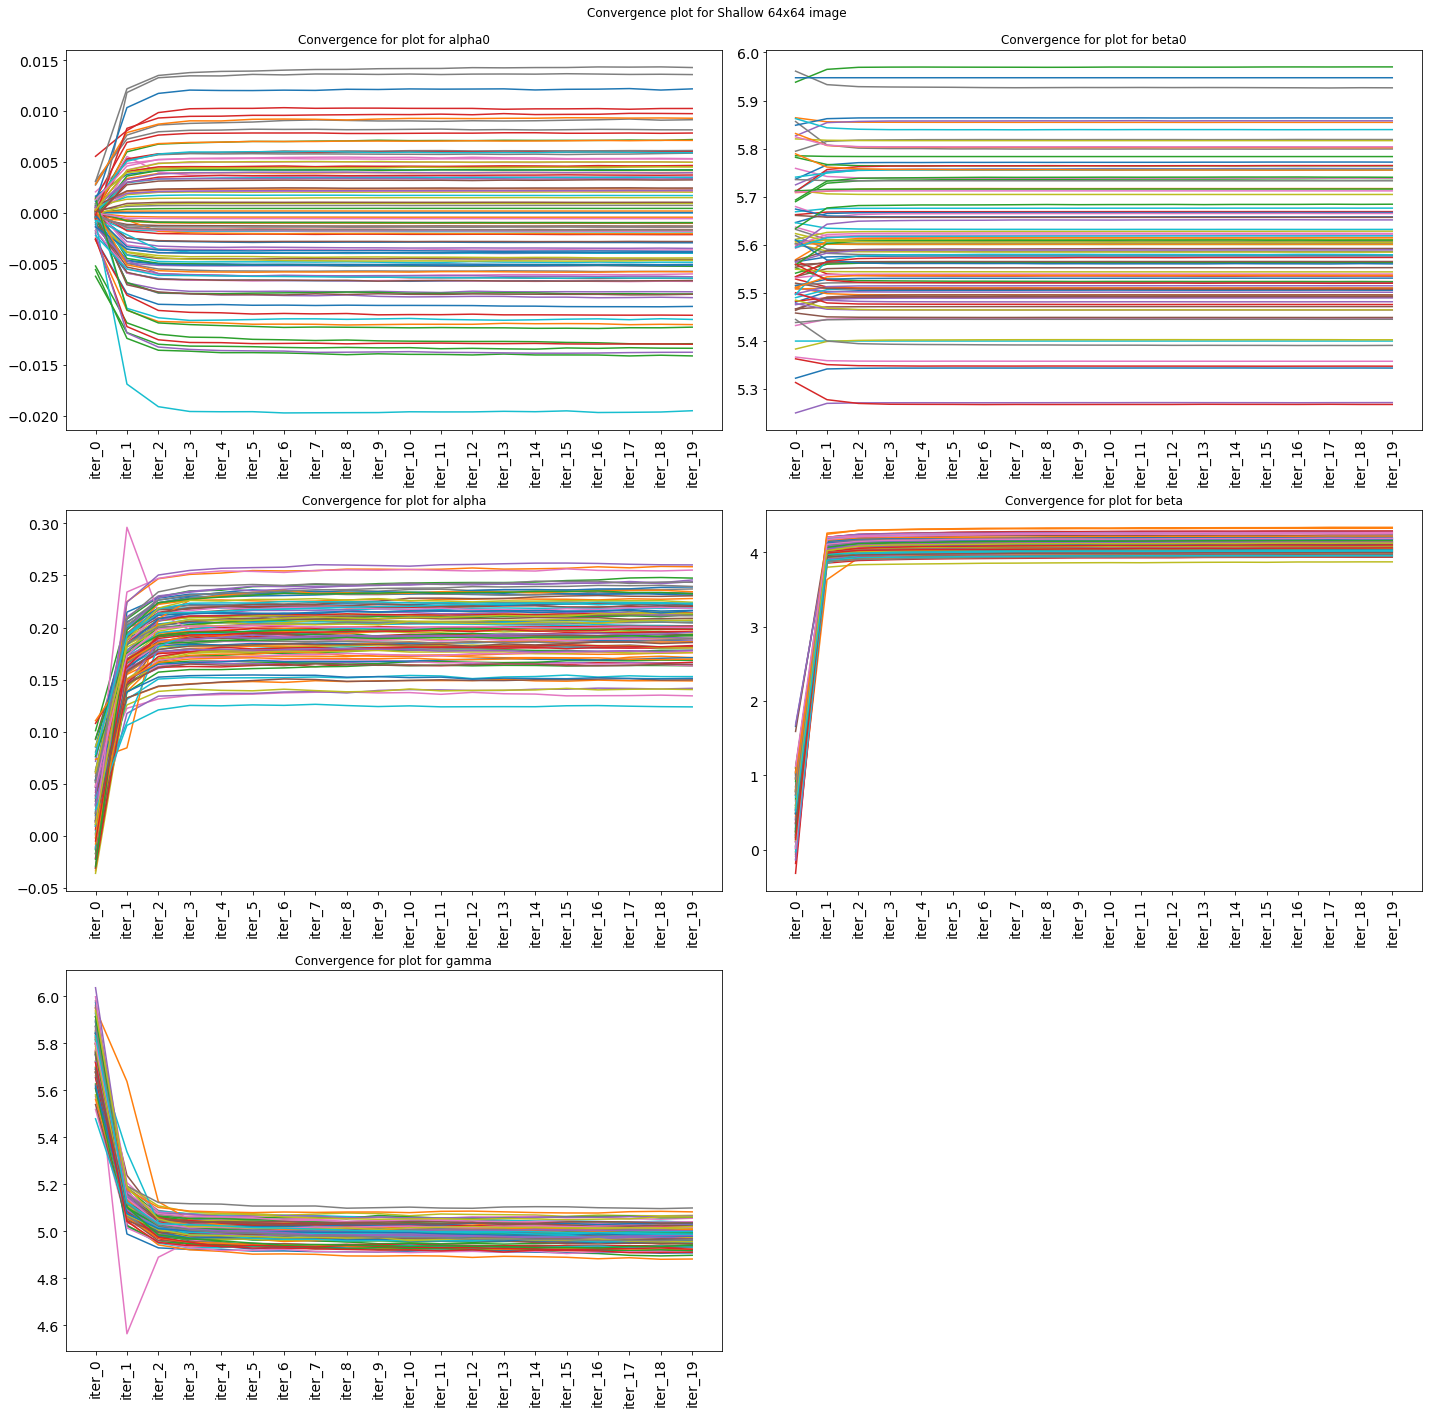

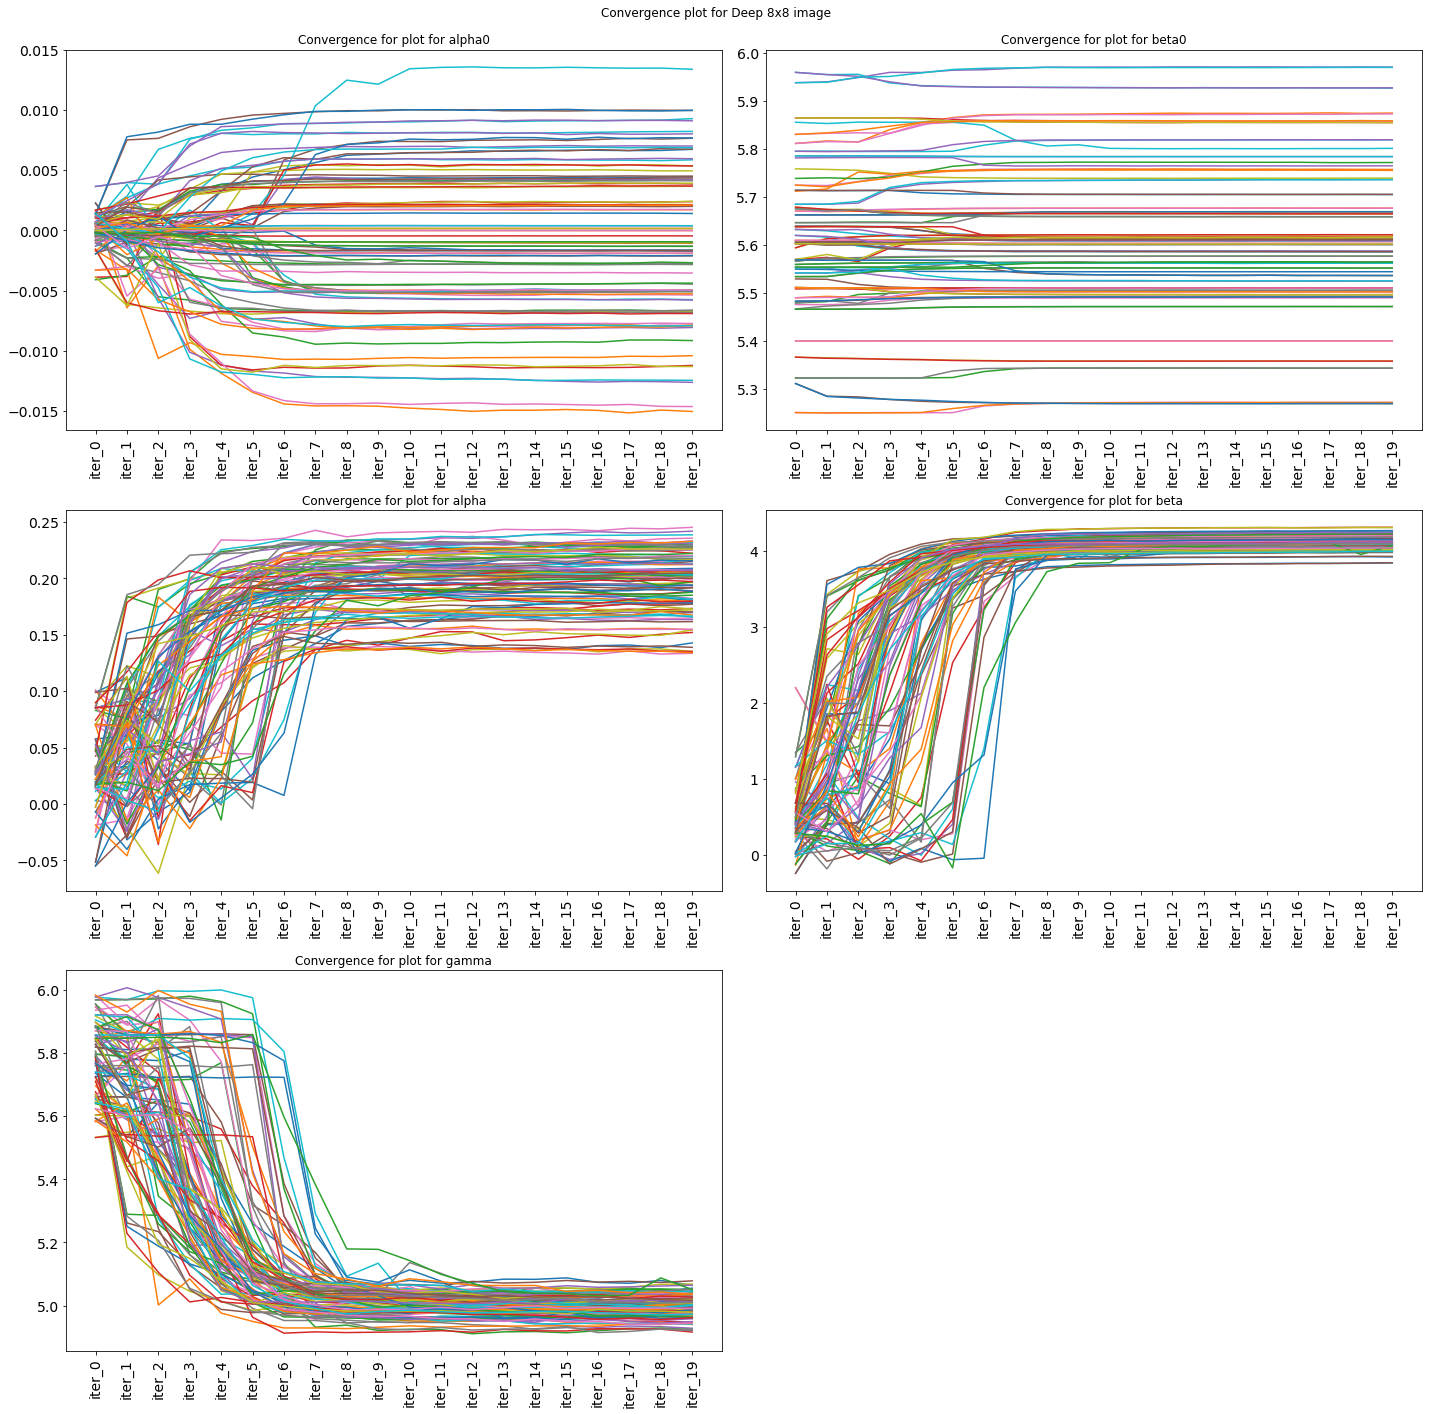

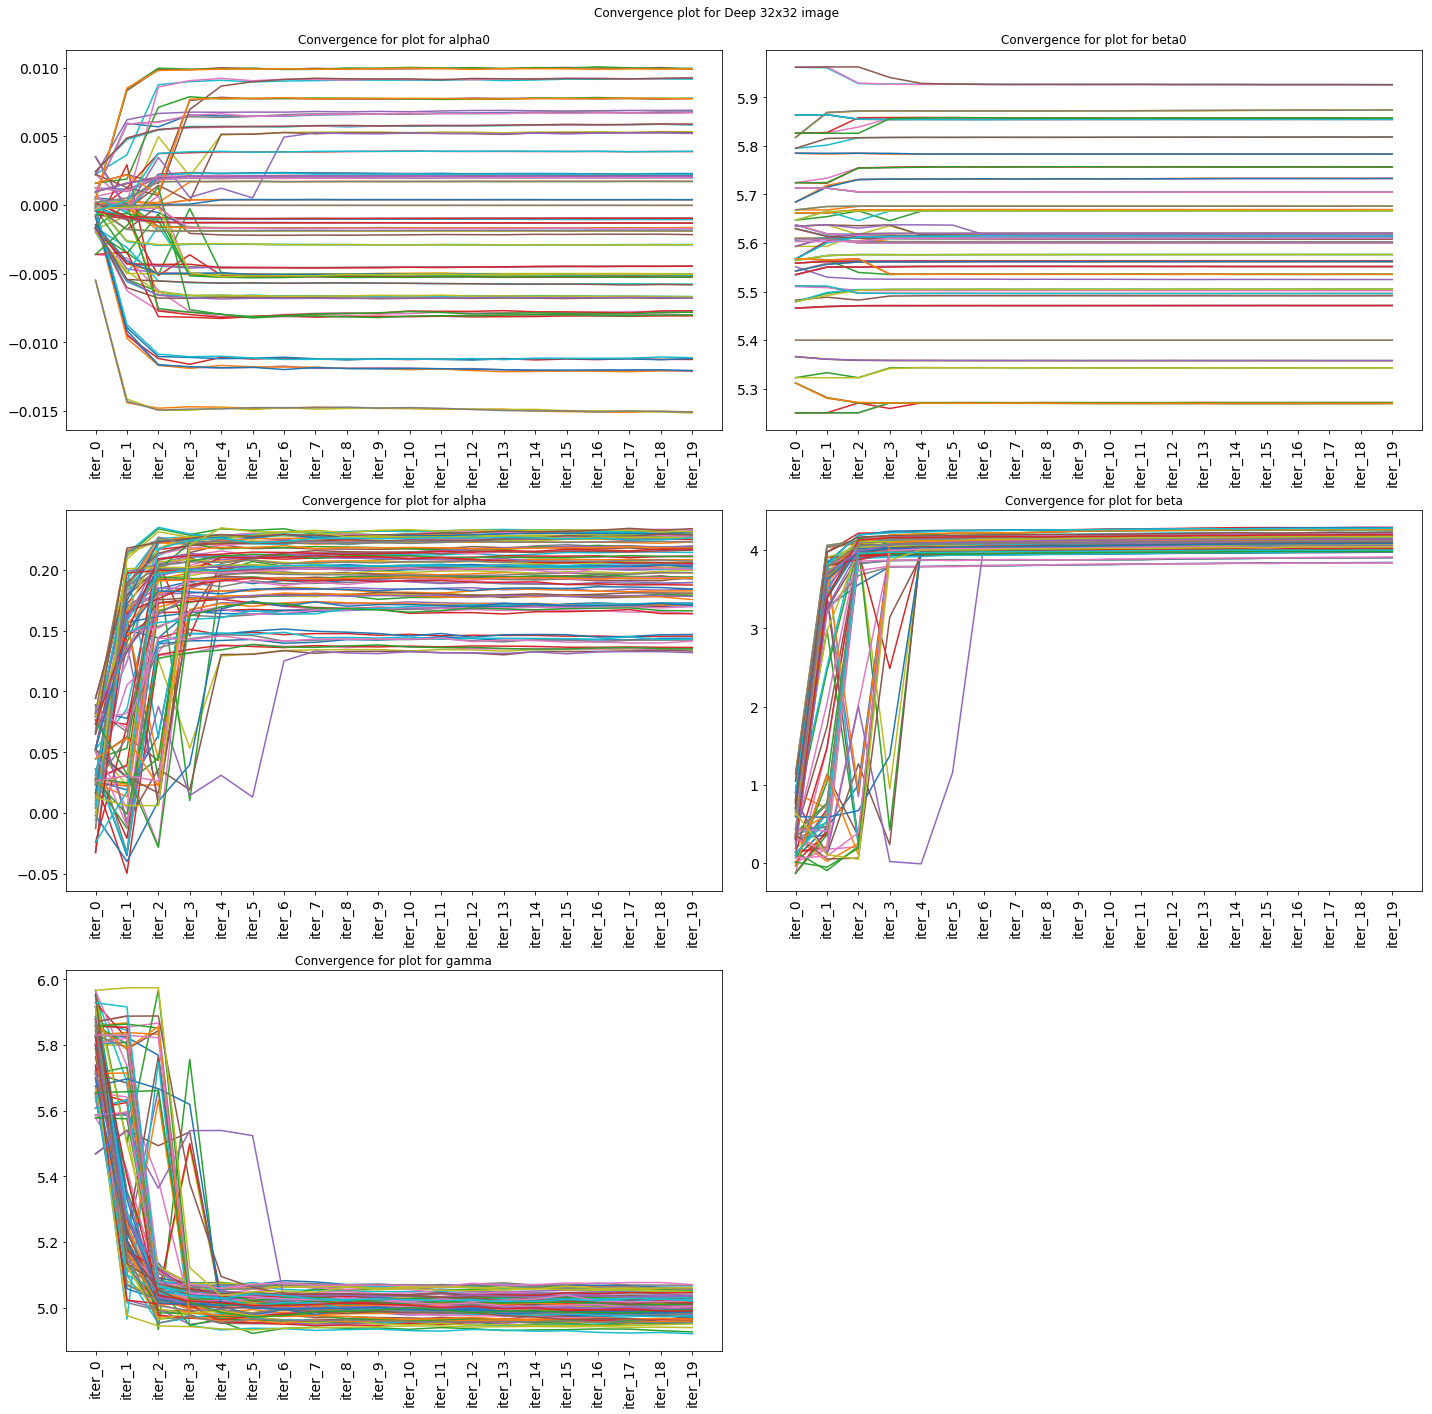

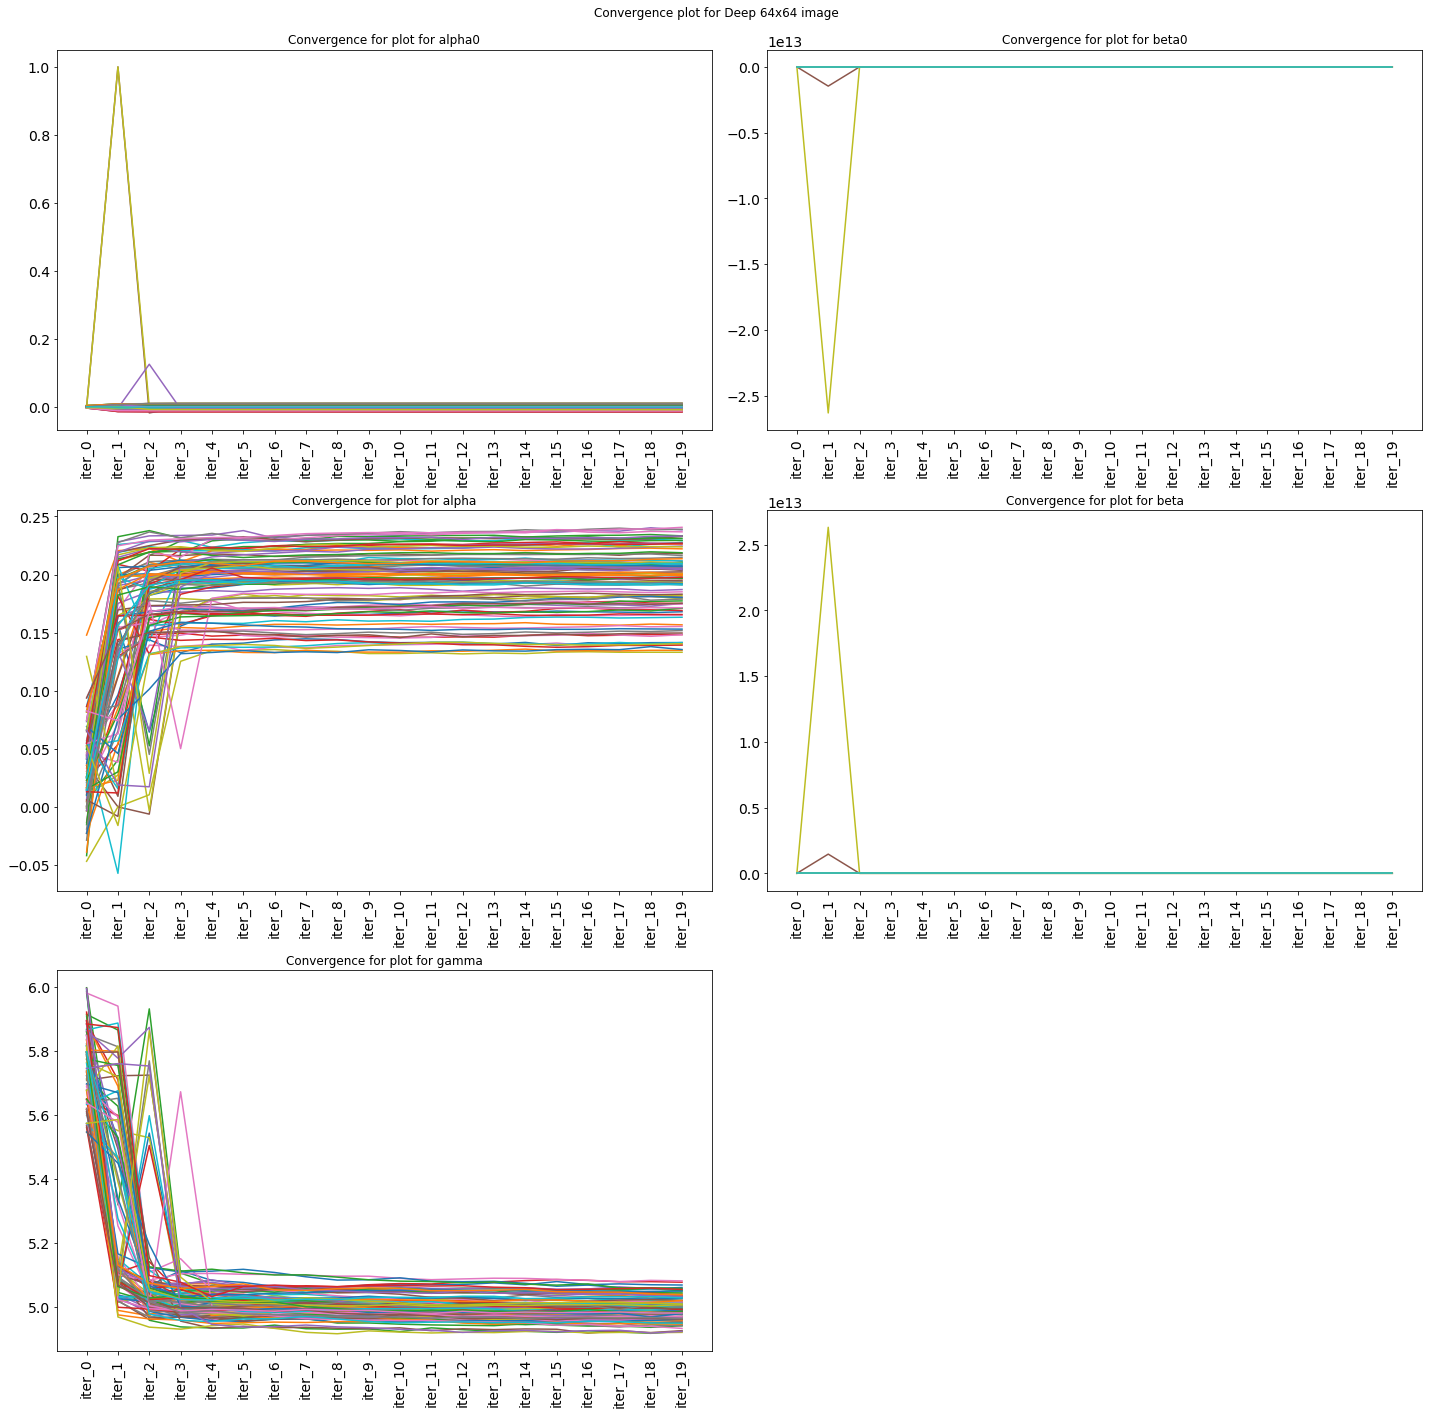

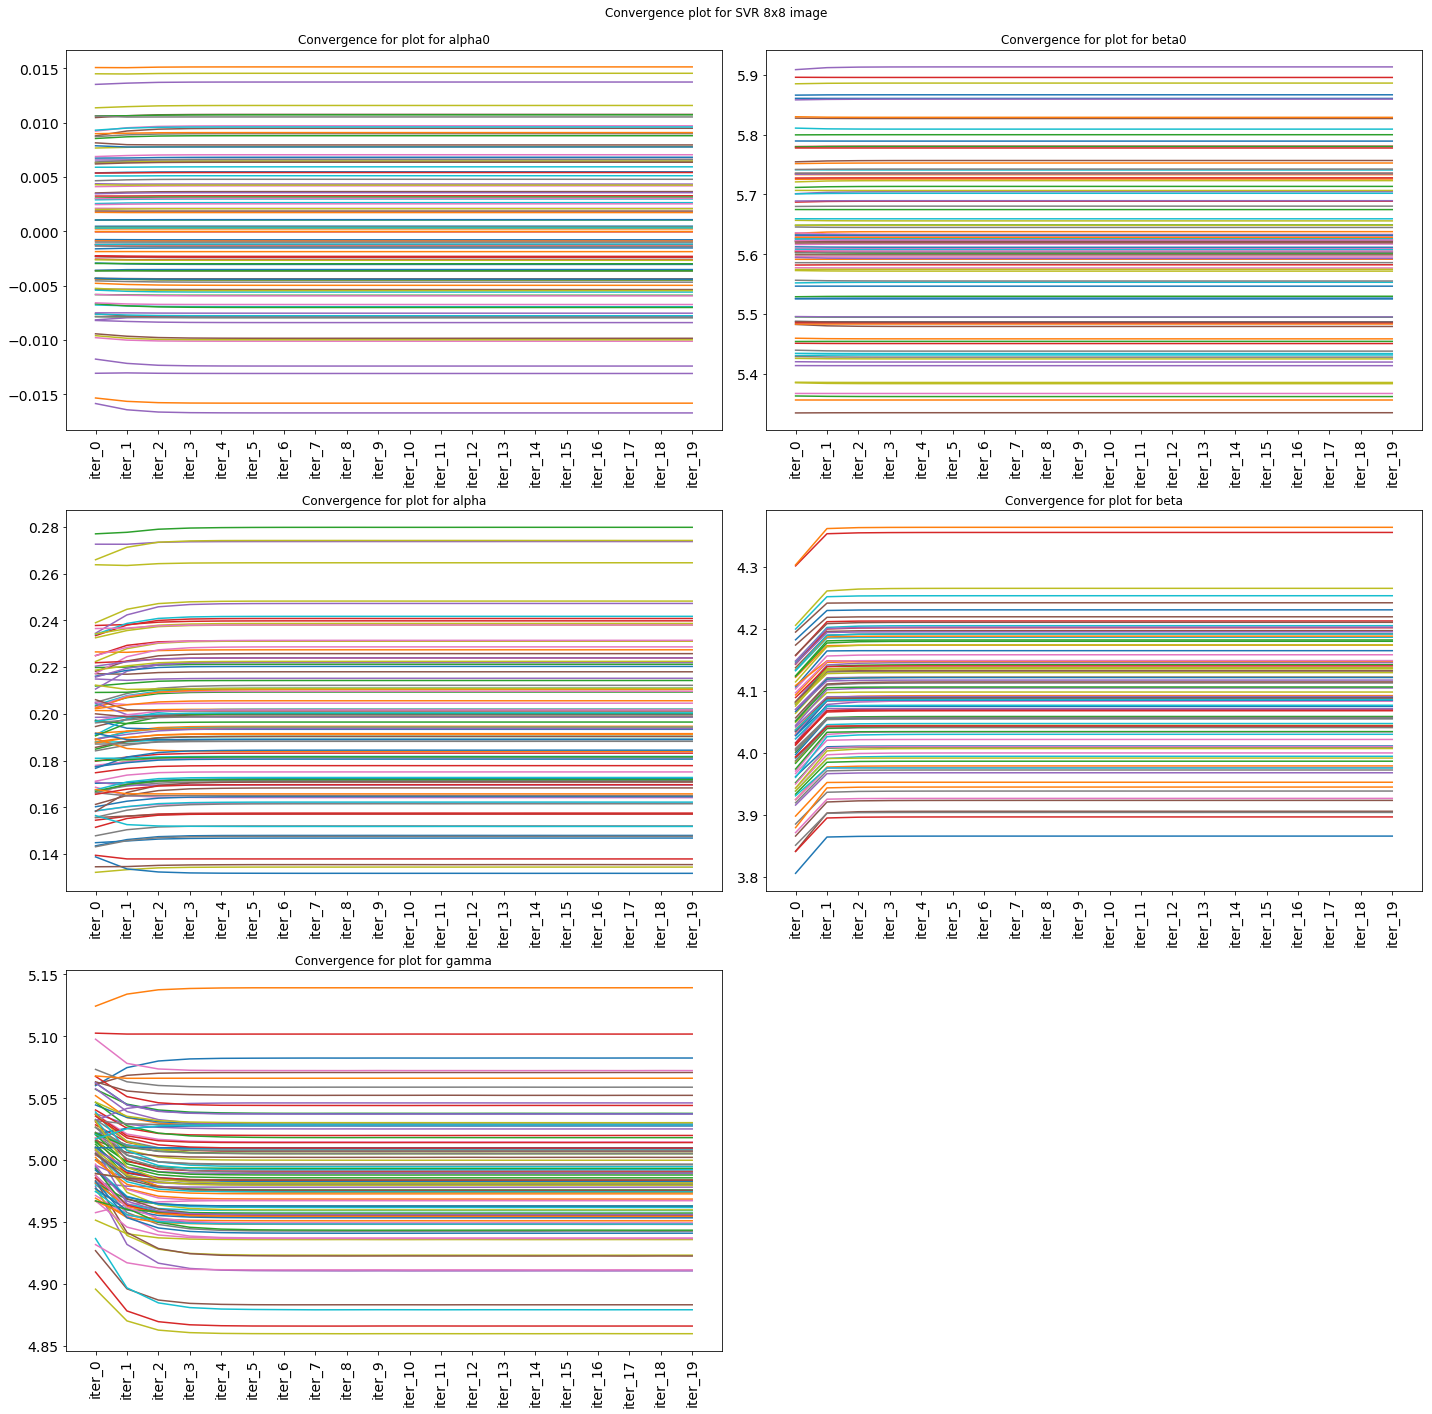

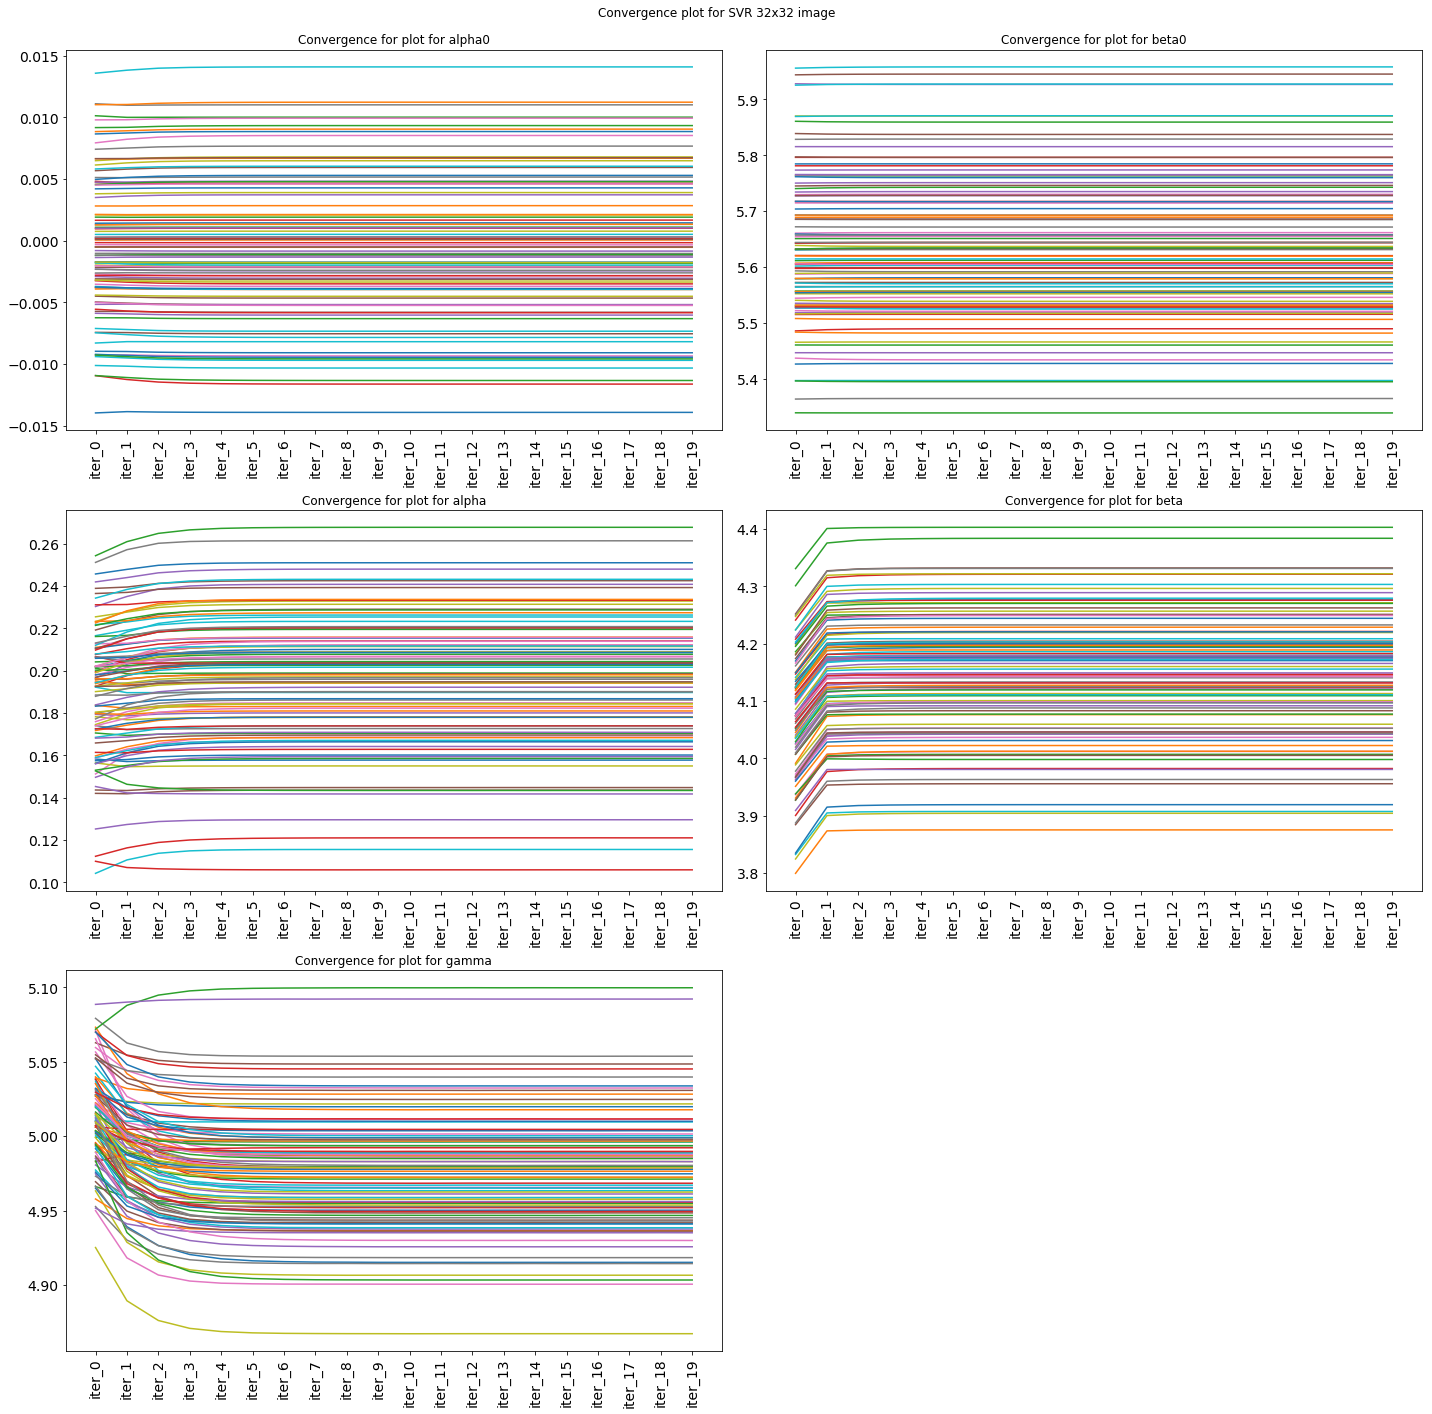

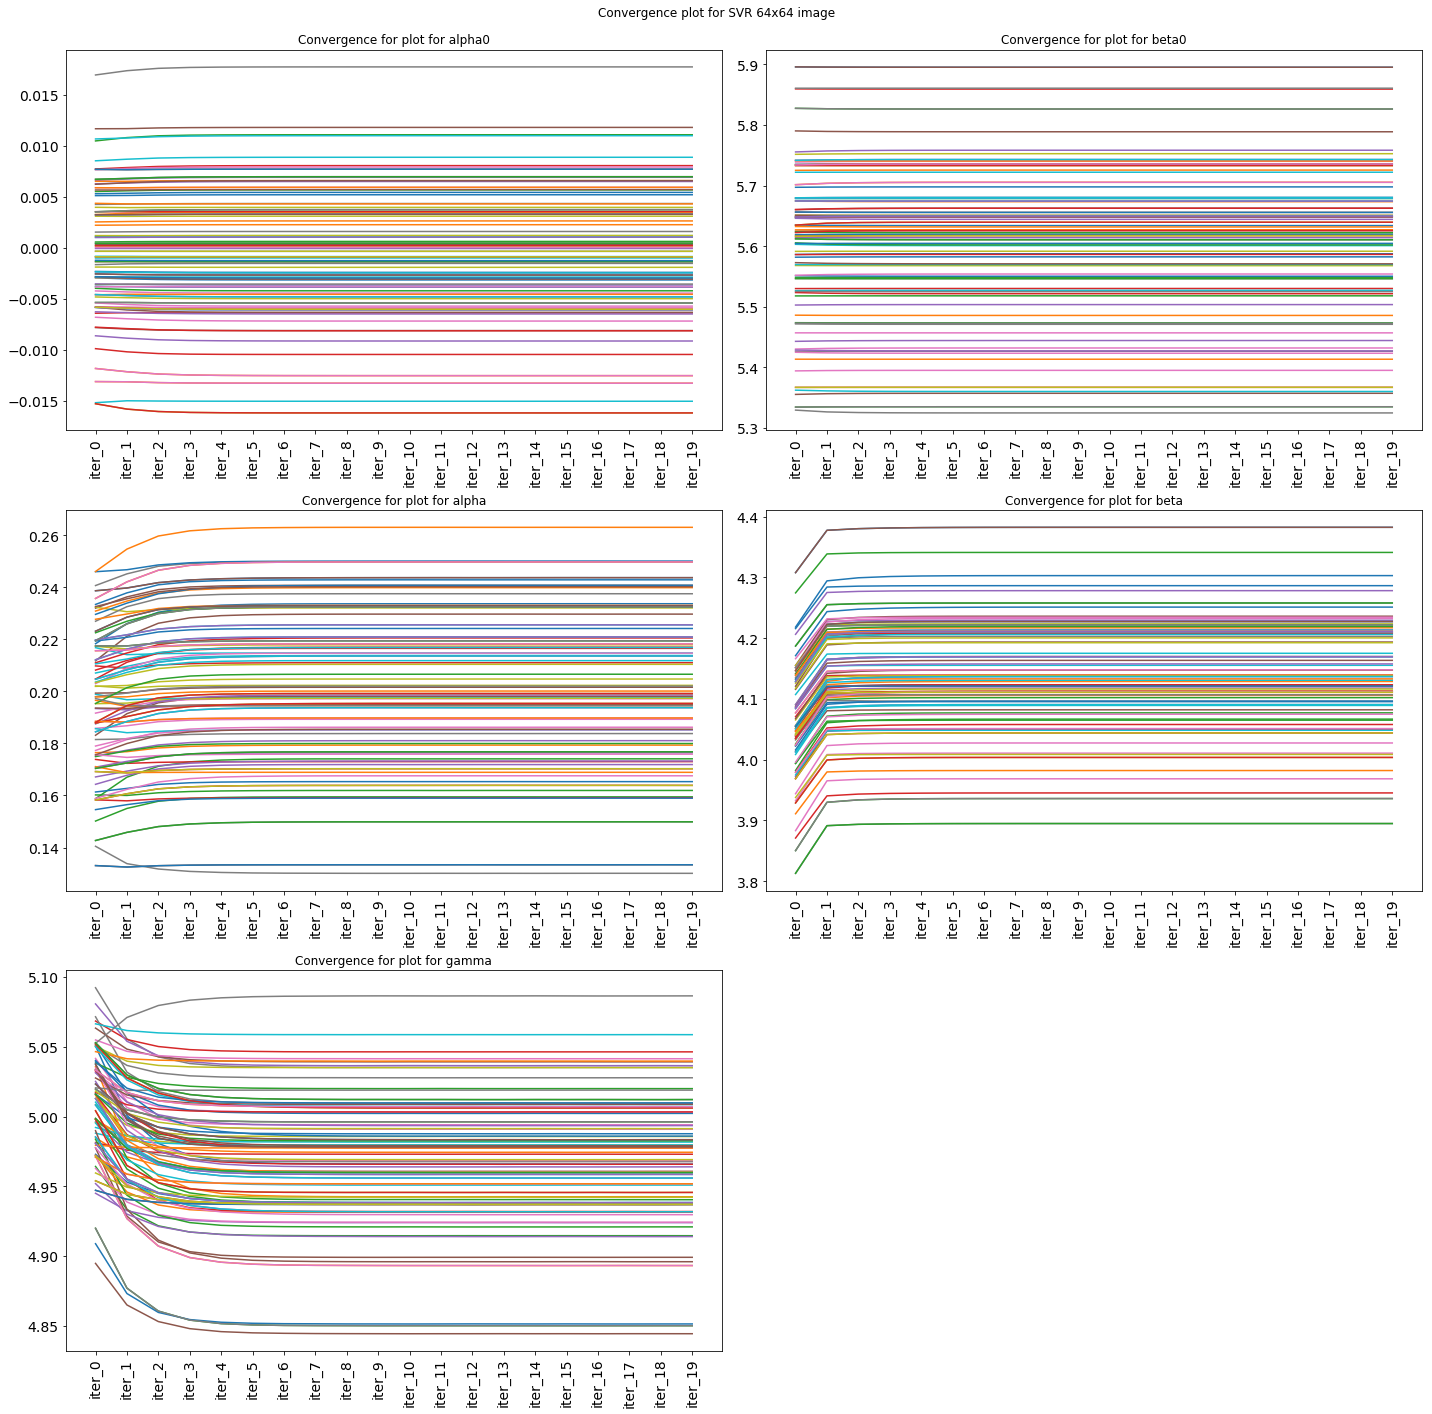

In [12]:
create_convergence_plot(df_8_shallow_format,title="Convergence plot for Shallow 8x8 image")
create_convergence_plot(df_32_shallow_format,title="Convergence plot for Shallow 32x32 image")
create_convergence_plot(df_64_shallow_format,title="Convergence plot for Shallow 64x64 image")

create_convergence_plot(df_8_deep_format,title="Convergence plot for Deep 8x8 image")
create_convergence_plot(df_32_deep_format,title="Convergence plot for Deep 32x32 image")
create_convergence_plot(df_64_deep_format,title="Convergence plot for Deep 64x64 image")

create_convergence_plot(df_8_svr_format,title="Convergence plot for SVR 8x8 image")
create_convergence_plot(df_32_svr_format,title="Convergence plot for SVR 32x32 image")
create_convergence_plot(df_64_svr_format,title="Convergence plot for SVR 64x64 image")
